In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from joblib import Parallel, delayed
import math
import json
import pickle as pkl

In [8]:
# Opens the Video file
cap= cv2.VideoCapture('data/mould3.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('data/mould3/mould_'+str(i)+'.jpg',frame)
    i+=1

cap.release()
cv2.destroyAllWindows()

In [19]:
def brgToRgb(image):
    b,g,r = cv2.split(image)
    rgb_img = cv2.merge([r,g,b])
    return rgb_img

In [1306]:
dirName = "data/mould3/no_movement"
for file in os.listdir(dirName):
    if (".jpg" in file):
        print(file)
        image = cv2.imread('{}/{}'.format(dirName,file))
        adjusted = image[:,220:980]
        hsvimage = cv2.cvtColor(adjusted, cv2.COLOR_BGR2HSV)
        filtered = np.array(hsvimage)
        filtered[filtered[:,:,0]>110] = 0
        filtered = cv2.cvtColor(filtered, cv2.COLOR_HSV2BGR)
        alpha = 1.2 # Contrast control (1.0-3.0)
        beta = 0 # Brightness control (0-100)
        contrasted = filtered
        contrasted = cv2.convertScaleAbs(contrasted, alpha=alpha, beta=beta)
        cv2.imwrite('data/mould3/clean/'+file,contrasted)
#plt.figure(figsize=(20,10))
#plt.imshow(contrasted)

mould_1172.jpg
mould_3003.jpg
mould_1614.jpg
mould_1600.jpg
mould_2309.jpg
mould_868.jpg
mould_3017.jpg
mould_1166.jpg
mould_2447.jpg
mould_1628.jpg
mould_698.jpg
mould_2321.jpg
mould_840.jpg
mould_2335.jpg
mould_854.jpg
mould_2453.jpg
mould_667.jpg
mould_673.jpg
mould_2484.jpg
mould_883.jpg
mould_1833.jpg
mould_1827.jpg
mould_897.jpg
mould_2490.jpg
mould_1199.jpg
mould_1416.jpg
mould_3201.jpg
mould_2679.jpg
mould_3567.jpg
mould_1370.jpg
mould_1364.jpg
mould_3573.jpg
mould_3215.jpg
mould_1402.jpg
mould_2123.jpg
mould_2645.jpg
mould_2651.jpg
mould_2889.jpg
mould_1358.jpg
mould_3229.jpg
mould_2137.jpg
mould_465.jpg
mould_2862.jpg
mould_303.jpg
mould_2876.jpg
mould_317.jpg
mould_471.jpg
mould_459.jpg
mould_3598.jpg
mould_2686.jpg
mould_2692.jpg
mould_1562.jpg
mould_3375.jpg
mould_3413.jpg
mould_1204.jpg
mould_1210.jpg
mould_3407.jpg
mould_2719.jpg
mould_3361.jpg
mould_1576.jpg
mould_2057.jpg
mould_3349.jpg
mould_1238.jpg
mould_288.jpg
mould_2731.jpg
mould_2725.jpg
mould_2043.jpg
mould_511

In [6]:
dirName = "data/mould3_5/gray"
files = []
for file in os.listdir(dirName):
    if (".jpg" in file):
        files.append('{}/{}'.format(dirName,file))

In [7]:
def getDistinctValues(j,image):
    values = set()
    for row in image:
        for col in row:
            values.add(tuple(col))
            #key = str(col)
            #if key not in values:
            #    values[key] = col
    return values

def getImageToMatrix(vlkey,image,j):
    shape = np.shape(image)
    shape = shape[0:-1]
    matrix = np.zeros(shape=shape)
    for i in range(len(image)):
        for j in range(len(image[i])):
            t = tuple(image[i][j])
            matrix[i][j] = vlkey[t]
    return [j,matrix]

def loadBatch(files,batchSize = 100):
    noBatches = math.ceil(len(files) / batchSize)
    start = 0
    for i in range(noBatches):
        images = []
        end = start + batchSize
        for file in files[start:end]:
            images.append(cv2.imread(file))
        yield images
        start += batchSize

In [8]:
backend = 'threading'
values = []
with Parallel(n_jobs=4,backend=backend) as parallel:
    for i,images in enumerate(loadBatch(files)):
        print(i,len(images))
        values += parallel(delayed(getDistinctValues)(j,image) for j,image in enumerate(images))

0 100
1 100
2 100
3 100
4 100
5 100
6 100
7 8


In [9]:
domain = set().union(*values)

In [10]:
vlKey = {}
for i,el in enumerate(domain):
    vlKey[el] = i 

In [11]:
backend = 'threading'
matrix = []
with Parallel(n_jobs=4,backend=backend) as parallel:
    for i,images in enumerate(loadBatch(files)):
        print(i,len(images))
        matrix += parallel(delayed(getImageToMatrix)(vlKey,image,j) for j,image in enumerate(images))
    matrix = sorted(matrix,key = lambda x: x[0])

0 100
1 100
2 100
3 100
4 100
5 100
6 100
7 8


In [12]:
print(np.shape(matrix))

(708, 2)


In [73]:
with open("keys_gray.pkl", 'wb') as file:
    pkl.dump(vlKey, file)

In [70]:
np.save("data_gray.npy",matrix)

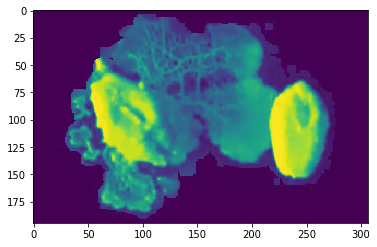

In [50]:
dirName = "data/mould3_5/gray"
file = "mould_350.jpg"
img = cv2.imread('{}/{}'.format(dirName,file),cv2.IMREAD_GRAYSCALE)
adjusted = img[50:245,33:340]
plt.imshow(adjusted)

In [7]:
dirName = "data/mould3_5/gray"
images = []
paths = []
for file in os.listdir(dirName):
    if (".jpg" in file):
        #print(file)
        paths.append([int(file.split("_")[1].replace(".jpg","")),f'{dirName}/{file}'])
        #img = cv2.imread('{}/{}'.format(dirName,file),cv2.IMREAD_GRAYSCALE)
        #img = img[50:245,33:340]
        #images.append(img)
paths = sorted(paths,key=lambda x:x[0])
for path in paths:
    img = cv2.imread(path[1],cv2.IMREAD_GRAYSCALE)
    img = img[50:245,33:340]
    images.append(img)
#print(paths)
np.save("data_gray.npy",images)

In [5]:
dirName = "data/mould3_5/clean"
for file in os.listdir(dirName):
    if (".jpg" in file):
        print(file)
        image = cv2.imread('{}/{}'.format(dirName,file))
        grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        cv2.imwrite('data/mould3_5/gray/'+file,grayimage)

mould_698.jpg
mould_101.jpg
mould_667.jpg
mould_673.jpg
mould_115.jpg
mould_36.jpg
mould_22.jpg
mould_129.jpg
mould_465.jpg
mould_303.jpg
mould_317.jpg
mould_471.jpg
mould_459.jpg
mould_288.jpg
mould_511.jpg
mould_277.jpg
mould_263.jpg
mould_505.jpg
mould_539.jpg
mould_707.jpg
mould_7.jpg
mould_706.jpg
mould_6.jpg
mould_538.jpg
mould_262.jpg
mould_504.jpg
mould_510.jpg
mould_276.jpg
mould_289.jpg
mould_458.jpg
mould_316.jpg
mould_470.jpg
mould_464.jpg
mould_302.jpg
mould_23.jpg
mould_128.jpg
mould_37.jpg
mould_672.jpg
mould_114.jpg
mould_100.jpg
mould_666.jpg
mould_699.jpg
mould_116.jpg
mould_670.jpg
mould_664.jpg
mould_102.jpg
mould_21.jpg
mould_35.jpg
mould_658.jpg
mould_499.jpg
mould_472.jpg
mould_314.jpg
mould_300.jpg
mould_466.jpg
mould_328.jpg
mould_506.jpg
mould_260.jpg
mould_274.jpg
mould_512.jpg
mould_248.jpg
mould_4.jpg
mould_704.jpg
mould_5.jpg
mould_705.jpg
mould_249.jpg
mould_275.jpg
mould_513.jpg
mould_507.jpg
mould_261.jpg
mould_329.jpg
mould_301.jpg
mould_467.jpg
mould_

In [15]:
matrix

[[369, array([[245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.],
         ...,
         [245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.]])],
 [369, array([[245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.],
         ...,
         [245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.]])],
 [369, array([[245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.],
         ...,
         [245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.],
         [245., 245., 245., ..., 245., 245., 245.]])]

In [ ]:
dirName = "Method\ 3/data2/brain"
images = []
paths = []
for file in os.listdir(dirName):
    if (".png" in file):
        #print(file)
        paths.append([int(file.split("_")[1].replace(".png","")),f'{dirName}/{file}'])
        #img = cv2.imread('{}/{}'.format(dirName,file),cv2.IMREAD_GRAYSCALE)
        #img = img[50:245,33:340]
        #images.append(img)
paths = sorted(paths,key=lambda x:x[0])
for path in paths:
    img = cv2.imread(path[1])#,cv2.IMREAD_GRAYSCALE)
    #img = img[50:245,33:340]
    images.append(img)
#print(paths)
np.save("Method\ 3/data2/data_brain.npy",images)